---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 5 

---

Please write your full name here
- **Name** : *Mahmoud Hamdy Mahmoud*

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [175]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
print(X.shape)
print(y.shape)

(250, 2)
(250,)


In [177]:
X

array([[ 8.41540974e-02,  1.13341197e-01],
       [ 1.05091536e+00,  1.54710235e-01],
       [-7.16555269e-01,  6.75607887e-01],
       [ 6.09316755e-02,  9.26542340e-01],
       [-1.00552480e+00,  3.36425155e-01],
       [ 7.63045744e-01, -4.82519400e-01],
       [ 1.30067681e+00, -4.60456076e-01],
       [ 8.93997023e-01, -5.39443631e-01],
       [ 1.01492378e+00,  2.49633435e-01],
       [-8.88621081e-01,  5.38566586e-01],
       [ 1.36613788e+00, -3.56819676e-01],
       [ 1.69872955e+00, -2.50238607e-01],
       [ 1.93909982e+00,  7.98335031e-02],
       [ 1.98164910e+00,  2.73166182e-01],
       [-1.92842298e-01,  9.90722796e-01],
       [ 1.87318667e+00, -1.28604429e-01],
       [ 1.12842503e+00, -4.29068613e-01],
       [ 9.60365014e-01,  5.24004362e-01],
       [ 6.83418960e-01, -4.32057757e-01],
       [ 8.36557987e-01,  5.74232279e-01],
       [ 2.04424212e+00,  4.47864563e-01],
       [ 7.89541222e-01,  4.20628768e-01],
       [-8.99855447e-01,  3.09253977e-01],
       [-1.

# Question 0
Set random seed to 47

In [178]:
np.random.seed(47)

# Question 1
Scatter plot the dataset

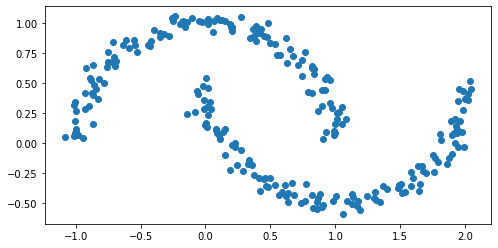

In [179]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=None)
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER: It won't perform very well as there's a big overlap between the 2 clusters as they won't be seprable in a good way cause they aren't uniform in density. So K-Means will not perform very well on these data it's prefered to use it on a seprable data

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER: We observe that at k = 4 is the optimal one as it's The starting point which starts slowing down which leads to marked decrement in inertia

->So from the scatter plot drawn with k = 2 we observe that K-Means didn't perform very well on the data 

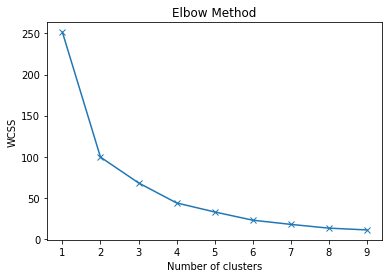

In [184]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, 'x-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [193]:
Kmodel = KMeans(n_clusters=2, random_state=0)
Kmodel.fit(X)
# pred_y = kmeans.fit_predict(X)
pred_y = kmeans.predict(X)
print(pred_y)


[0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]


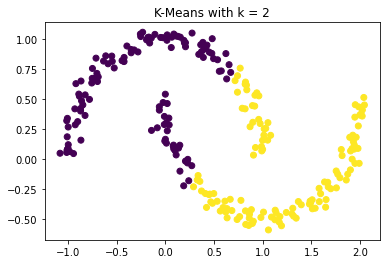

In [195]:
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.title("K-Means with k = 2")
plt.show()

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

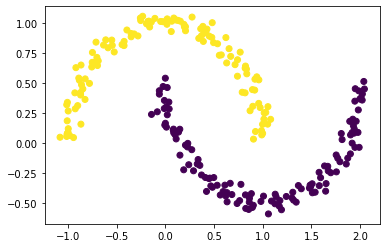

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
pred_y = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER: 
DBSCAN did very well on this data as it's based on the density of the data unlike the K-Means which is based on the difference between the mean(avg) of the data and the data points themselves so the DBSCAN is very useful for this kind of data as it's clustering the data according to how dense they are 

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER: 
As the K-Menas looks to how the data are alligned in such a spherical way to calculate their centroid but the provided data wasn't spherical which will be very difficult for K-Means to cluster them so we can use the DBSCAN on this model which will cluster them better than the K-Means

In [199]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [200]:
Kmodel = KMeans(n_clusters=2,random_state=0)
# Kmodel.fit(X)
pred_y = kmeans.fit_predict(X_aniso)

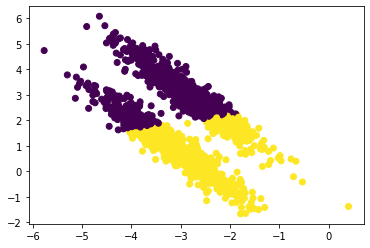

In [201]:
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=pred_y)
plt.show()

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [202]:
def K_Means_algo(nClusters, data):
  centeroids = data[np.random.choice(data.shape[0], nClusters, replace=False)]
  while(True):
     #Get the array with (Xp-Xc)**2 and (yp-yc)**2
    differences_square = np.array([(X-centeroids[i])**2 for i in range(nClusters)])
    #Sum them to get the Eculidean distance
    distances = np.sqrt([[differences_square[i][j][0]+differences_square[i][j][1] for j in range(len(differences_square[i]))] for i in range(nClusters)]) 
    #Get the min differences indices column-wise
    min_distances_labels = np.argmin(distances, axis = 0)
    #Get the new centroids
    new_Centroids = np.array([data[min_distances_labels == i].mean(axis = 0) for i in range(nClusters)])
    #As the centroids didn't change then they're the cluster's centroids
    if(np.all(new_Centroids == centeroids)):
      break
    #Update the centroids
    centeroids = new_Centroids
  return centeroids

# Question 6
For the following dataset:

In [205]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])


[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels. 
- How many clusters do you see?

ANSWER: we can see 4 clusters

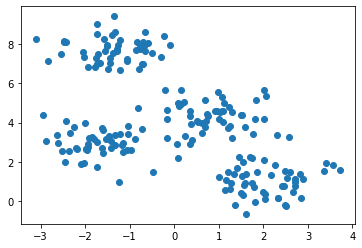

In [206]:
plt.scatter(X[:,0], X[:,1], c=None)
plt.show()

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

In [214]:
Kmodel = KMeans(n_clusters=4, random_state=0)
pred_y = Kmodel.fit_predict(X)

In [215]:
Kmodel.cluster_centers_

array([[-1.36512238,  7.70188306],
       [-1.70639178,  2.9104771 ],
       [ 2.07464749,  0.9869902 ],
       [ 0.86008475,  4.31501411]])

In [216]:
K_Means_algo(4, X)

array([[ 0.8800426 ,  4.33705463],
       [-1.36512238,  7.70188306],
       [-1.67478716,  2.91620098],
       [ 2.07464749,  0.9869902 ]])

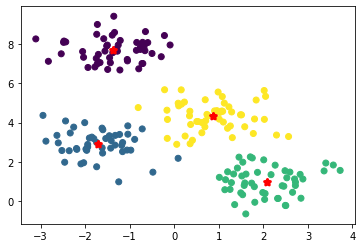

In [217]:
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(Kmodel.cluster_centers_[:, 0], Kmodel.cluster_centers_[:, 1], marker = '*', linewidths = 3 , c='r')
plt.show()

- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred_y)

0.0

In [219]:
pred_y

array([2, 1, 3, 0, 2, 3, 1, 3, 3, 3, 3, 2, 1, 1, 2, 3, 0, 0, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 2, 1, 3, 1, 3, 3, 0, 0, 0, 0, 3,
       2, 1, 3, 0, 0, 3, 0, 1, 1, 0, 3, 0, 1, 2, 3, 2, 0, 3, 2, 3, 0, 3,
       2, 0, 1, 1, 2, 2, 3, 3, 1, 0, 1, 1, 2, 2, 0, 3, 2, 1, 1, 3, 3, 2,
       1, 1, 0, 0, 0, 3, 3, 2, 1, 0, 3, 3, 0, 2, 2, 0, 0, 1, 3, 2, 2, 3,
       0, 1, 1, 2, 2, 3, 1, 1, 0, 3, 0, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1, 2,
       3, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 1, 0, 0, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 3, 2, 2, 1, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 3, 0, 2, 2, 3, 0, 1, 1, 1, 3,
       0, 2])

In [220]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

- Why is the accuracy so low?

ANSWER: Because the clusters numbers aren't matched so they gotta be relabeled

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [221]:
import statistics as s
def relabel(n_clusters, true_labels, pred_labels):
    new_labels = []
    for i in range(n_clusters):
      cluster_label = true_labels[pred_labels == i]
      cluster_mode = s.mode(cluster_label)
      new_labels.append(cluster_mode)
    return new_labels

In [222]:
# print(y)
new1 = relabel(4, y, pred_y)
new1

[3, 2, 1, 0]

In [223]:
y_relabel = pred_y.copy()
for i in range(len(pred_y)):
    y_relabel[i] = new1[y_relabel[i]]

In [224]:
# new_labels = relabel(n_clusters, true_labels, pred_labels)
# assert new_labels == n_clusters

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [225]:
from sklearn.metrics import accuracy_score
print("Accuracy score is", accuracy_score(y, y_relabel))

Accuracy score is 0.99


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [226]:
def kmedoids_algo(X_data, k):

        # Initialize the medoids randomly
        m = X_data.shape[0]
        idx = np.random.choice(m, k, replace=False)
        medoids = X_data[idx]

        # Assign each point to the closest medoid
        labels = np.argmin(np.linalg.norm(X_data[:, None] - medoids[None], axis=-1), axis=-1)

        # Update the medoids
        for i in range(k):
            medoid_idx = np.where(labels == i)[0]
            if len(medoid_idx) > 0:
                J = np.sum(np.linalg.norm(X_data[medoid_idx][:, None] - X_data[medoid_idx][None], axis=-1), axis=-1)
                j = np.argmin(J)
                idx[i] = medoid_idx[j]
                medoids[i] = X_data[idx[i]]

        # Repeat until convergence
        while True:
            labels_old = labels

            # Assign each point to the closest medoid
            labels = np.argmin(np.linalg.norm(X_data[:, None] - medoids[None], axis=-1), axis=-1)

            # Check for convergence
            if np.array_equal(labels, labels_old):
                break

            # Update the medoids
            for i in range(k):
                medoid_idx = np.where(labels == i)[0]
                if len(medoid_idx) > 0:
                    J = np.sum(np.linalg.norm(X_data[medoid_idx][:, None] - X_data[medoid_idx][None], axis=-1), axis=-1)
                    j = np.argmin(J)
                    idx[i] = medoid_idx[j]
                    medoids[i] = X_data[idx[i]]

        return labels, medoids

- Apply YOUR k-medoids clustering algorithm with 4 clusters 
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

In [227]:
import pandas as pd
url ='https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat'
data = pd.read_csv('faithful.dat.csv', sep='\s+')
data

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


In [228]:
labels, med = kmedoids_algo(data.values, 4)
med

array([[ 4.417, 83.   ],
       [ 4.233, 76.   ],
       [ 2.017, 52.   ],
       [ 2.283, 62.   ]])

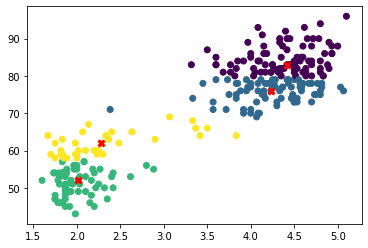

In [229]:
plt.scatter(data['eruptions'], data['waiting'], c=labels)
plt.scatter(med[:, 0], med[:, 1], marker = 'x', linewidths = 3 , c='r')
plt.show()